In [55]:
import os
import pandas as pd 
import numpy as np
import multiprocessing # 여러 개의 일꾼 (cpu)들에게 작업을 분산시키는 역할
from multiprocessing import Pool 
from functools import partial # 함수가 받는 인자들 중 몇개를 고정 시켜서 새롭게 파생된 함수를 형성하는 역할
from data_loader_v2 import data_loader_v2 # 자체적으로 만든 data loader version 2.0 ([데이콘 15회 대회] 데이터 설명 및 데이터 불러오기 영상 참조)

import joblib # 모델을 저장하고 불러오는 역할
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [1]:
train_folder = './train/'
test_folder = './test/'
train_label_path = './train_label.csv'

In [3]:
train_list = os.listdir(train_folder)
test_list = os.listdir(test_folder)
train_label = pd.read_csv(train_label_path, index_col=0)

In [4]:
def data_loader_all_v2(func, files, folder='', train_label=None, event_time=10, nrows=60):   
    func_fixed = partial(func, folder=folder, train_label=train_label, event_time=event_time, nrows=nrows)     
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close()
        pool.join()        
    combined_df = pd.concat(df_list)    
    return combined_df

In [5]:
train = data_loader_all_v2(data_loader_v2, train_list, folder=train_folder, train_label=train_label, event_time=10, nrows=60)

In [6]:
train.head()

,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,...,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120,label
0,30.474394,8.691177,8.714483,8.687399,8.721230,207.697895,165.865730,-6.018877e-19,0.0,-0.002136,...,1.0,1.0,1.0,60.0,0.0,0.0,1.421620e-05,85.4,0.0,110
0,30.470463,8.736521,8.682769,8.717135,8.682402,192.665080,191.006871,-3.918758e-19,0.0,0.001710,...,1.0,1.0,1.0,60.0,0.0,0.0,-6.114455e-06,85.4,0.0,110
0,30.465427,8.753559,8.663426,8.700049,8.734147,187.065171,192.700238,-1.799179e-19,0.0,0.000493,...,1.0,1.0,1.0,60.0,0.0,0.0,-1.813291e-05,85.4,0.0,110
0,30.458532,8.715056,8.714854,8.717174,8.699257,188.500036,180.150567,-6.636971e-19,0.0,0.000318,...,1.0,1.0,1.0,60.0,0.0,0.0,-5.745568e-07,85.4,0.0,110
0,30.475773,8.790241,8.735125,8.703167,8.721030,193.269046,195.984890,-6.379752e-20,0.0,-0.000091,...,1.0,1.0,1.0,60.0,0.0,0.0,8.437883e-06,85.4,0.0,110


In [7]:
train.shape

(41400, 5122)

In [8]:
train.label.nunique()

198

In [25]:
# na 값 확인
# data_loader_v2 를 사용하여 na값이 없이 나온다
na_value = train.isna().sum()
na_value = na_value[na_value.values > 0]
na_value

Series([], dtype: int64)

In [26]:
# 5122개의 float, 1개의 int
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41400 entries, 0 to 99
Columns: 5122 entries, V0000 to label
dtypes: float64(5121), int64(1)
memory usage: 1.6 GB


In [29]:
# 중복행 없음
train.drop_duplicates().shape

(41400, 5122)

In [36]:
# columns의 전체 값이 0 인 column제거 (추후에 제거)
sum_value = train.sum(axis=0)
drop_sum_value = sum_value[sum_value == 0]

In [49]:
# 범주형 변수 찾기
nuni = train.nunique()
cat_value = nuni[nuni.values <= 20]

In [78]:
a = train['label'].sort_values()
a = a.reset_index(drop=True)
A = a[a.values <= 100]
B = a[a.values > 100]

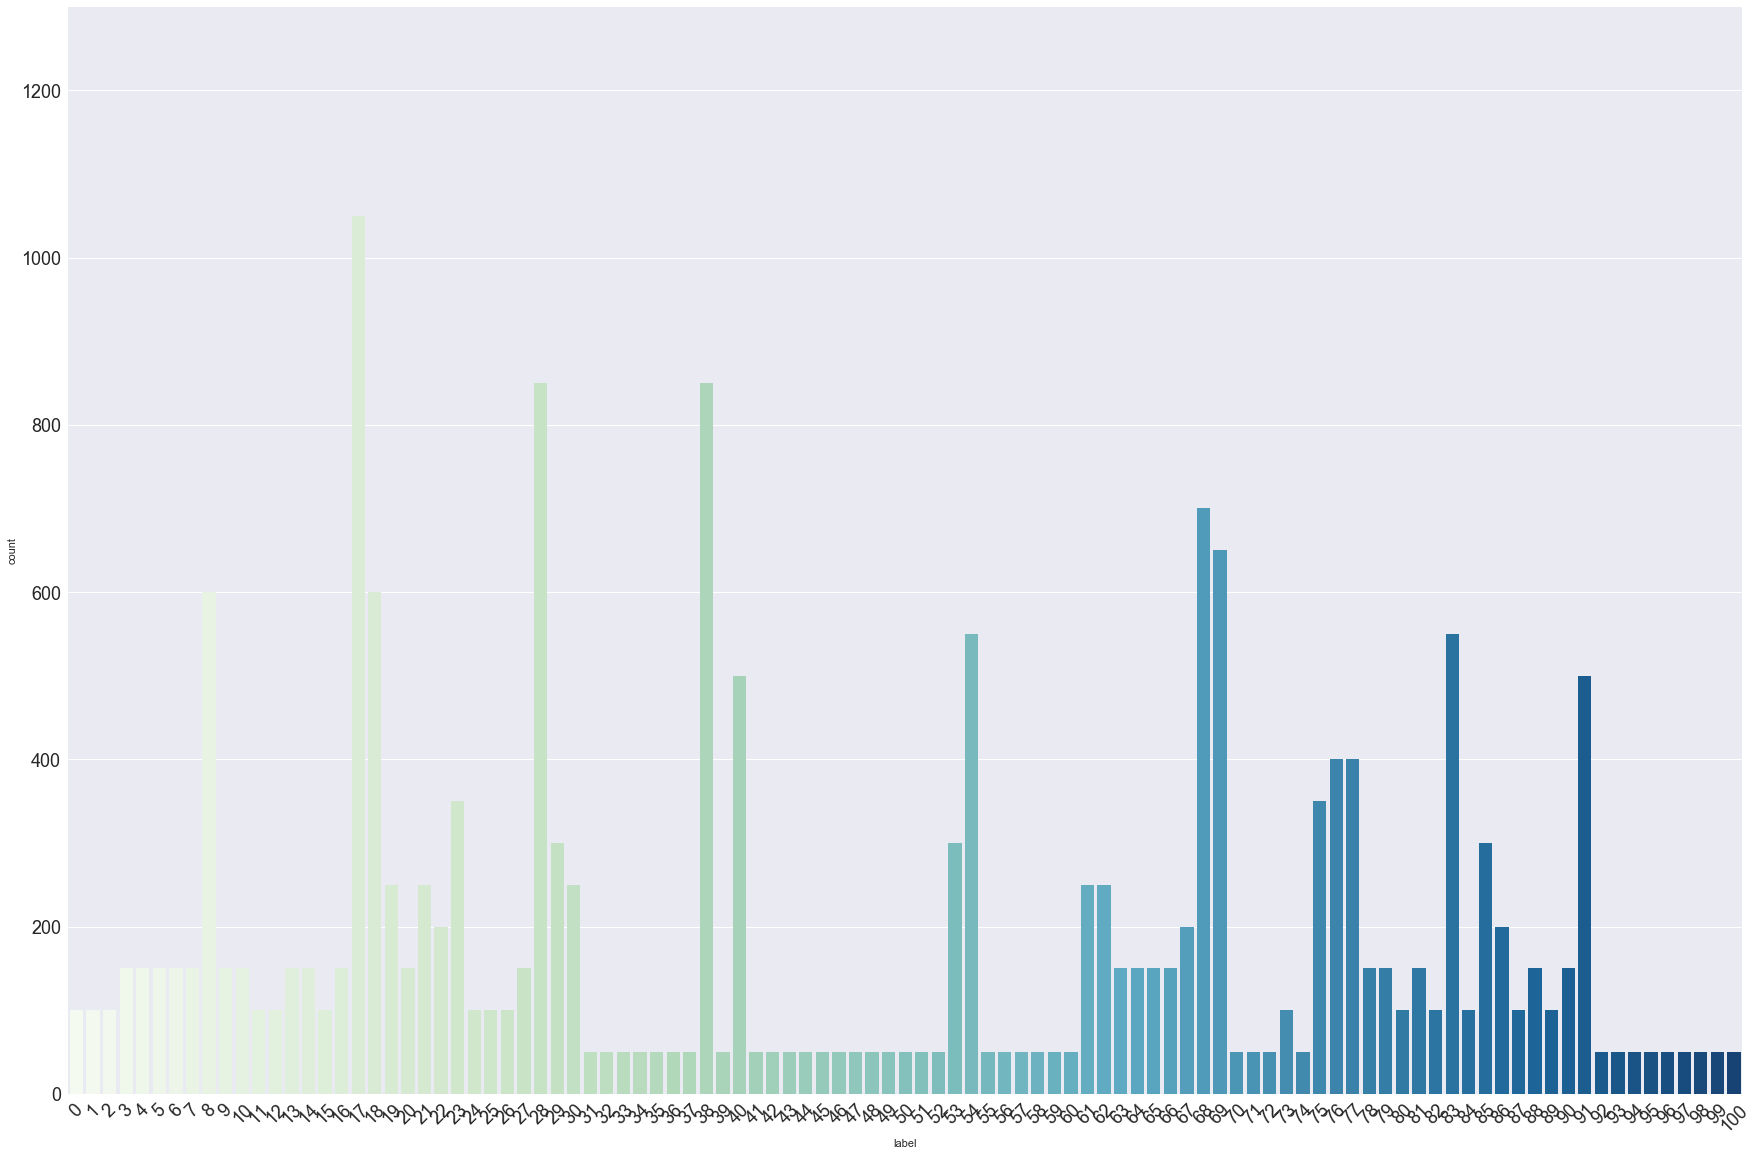

In [79]:
plt.figure(figsize=(30,20))
sns.countplot(A,  palette='GnBu')
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.ylim(0,1300)
plt.show()

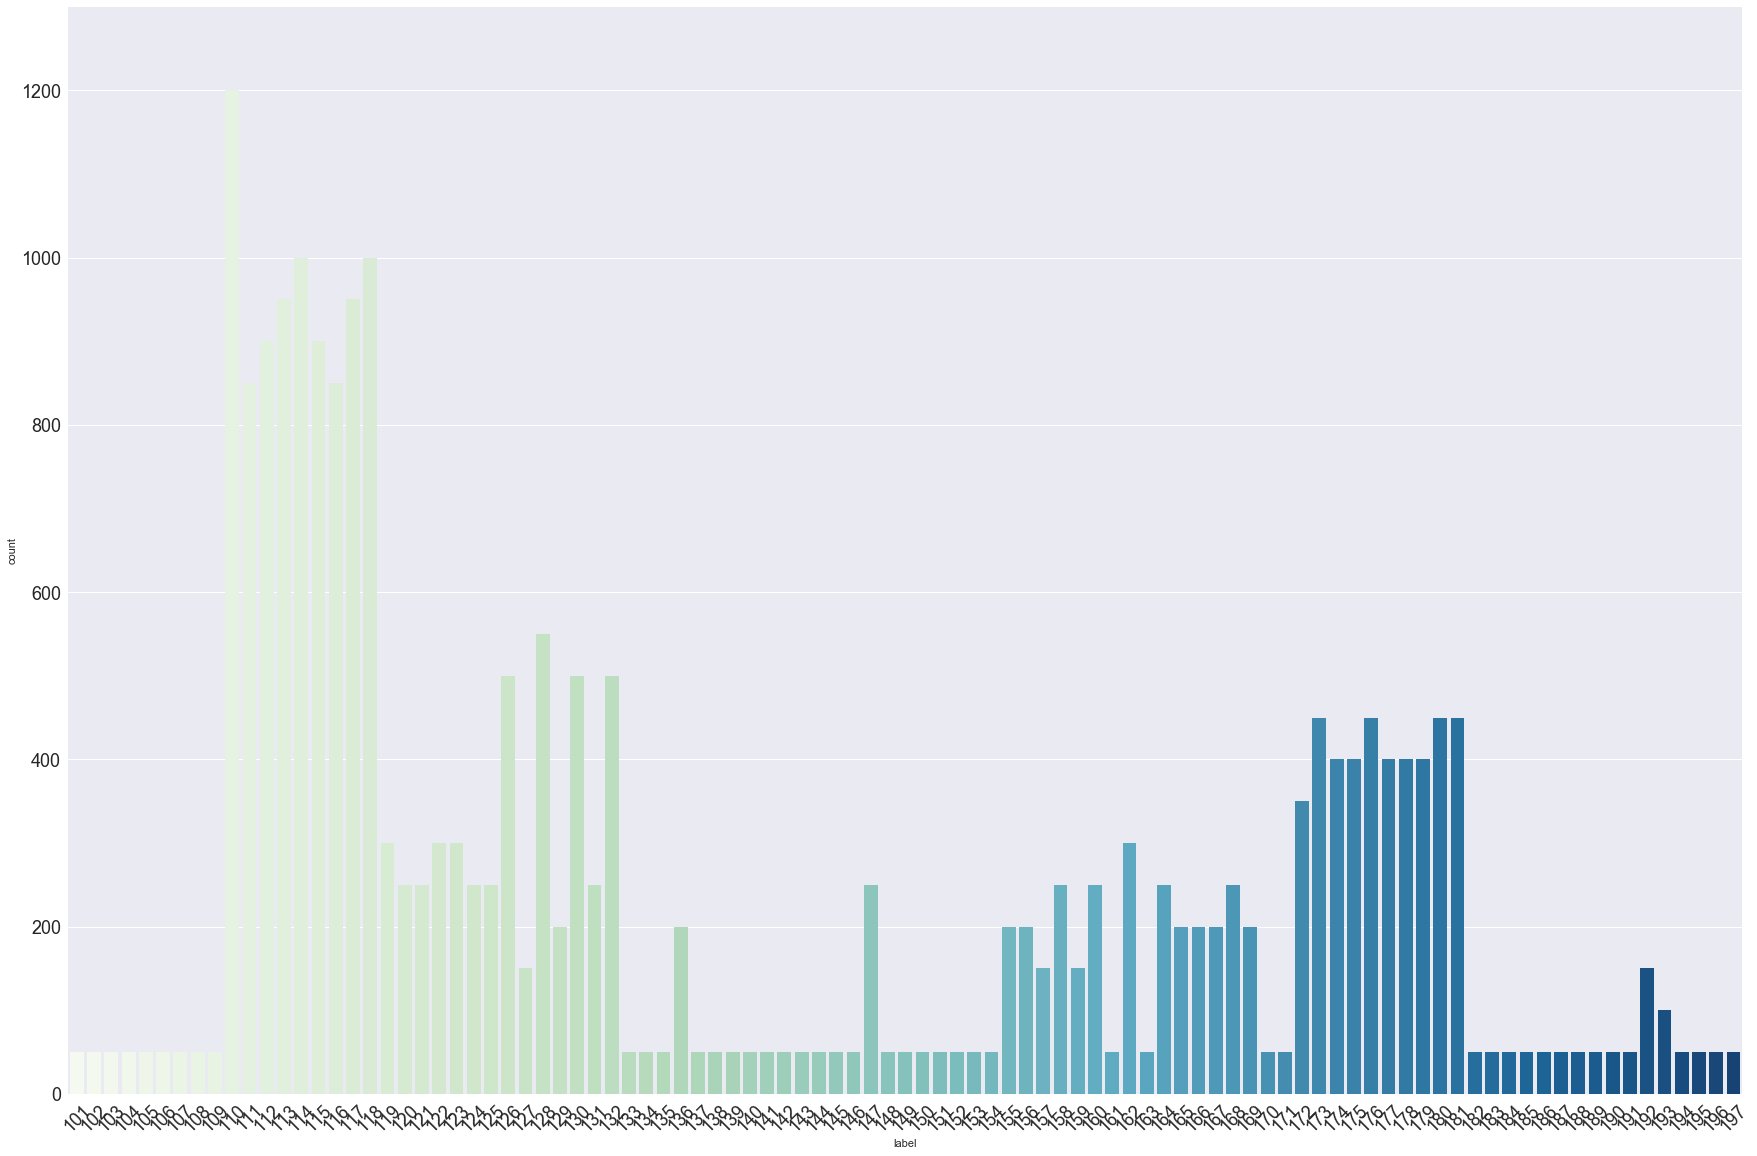

In [80]:
plt.figure(figsize=(30,20))
sns.countplot(B,  palette='GnBu')
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.ylim(0,1300)
plt.show()